# Data Science And Business Analytics(GRIP July'22)
### Task 1: Prediction using Supervised ML
### Author: Lavanya Rustagi
Problem Statement: </br>
*What will be predicted score if a student studies for 9.25hrs/day?*

In [4]:
#Importing Importing all the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
#Importing data set and vizualizing Data
df= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data has been successfully imported')
df

Data has been successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Here, we have data of 25 students- study hours and score achieved. </br>We will plot the data so that we can roughly find relationship between study hours and scores.

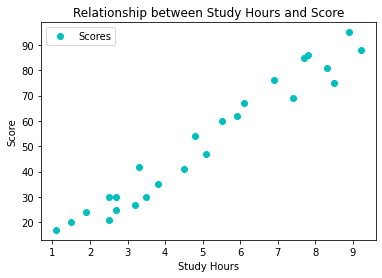

In [6]:
#Plotting the data using Matplotlib Library
df.plot(x='Hours',y='Scores', style='o', color='c')
plt.title('Relationship between Study Hours and Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

**We can clearly observe that there is a positive linear relationship between study hours and score.**

---

### Preparing data
Dividing the data into train and test dataset.

In [7]:
#Using train_test_spilt from scikit-learn library
x= df.drop('Scores',axis=1)
y= df['Scores']

train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=123)

### Training the Algorithm
Now, we fit 80% of our data as training data set into the linear regression algorithm

In [8]:
lin= LinearRegression()
lin.fit(train_x,train_y)

print('Fitting the data into Linear Regression algorithm is complete')

Fitting the data into Linear Regression algorithm is complete


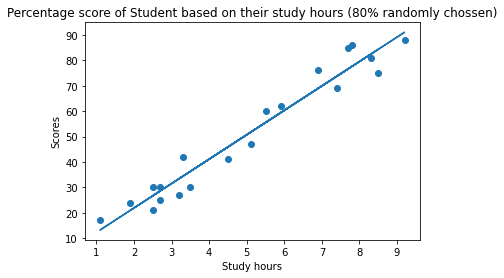

In [9]:
#the regression line (y= a+bx)
line= lin.intercept_+lin.coef_*train_x

#Plotting the scatter plot with regression line
plt.scatter(train_x,train_y)
plt.plot(train_x,line)
plt.title('Percentage score of Student based on their study hours (80% randomly chossen)')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.show()

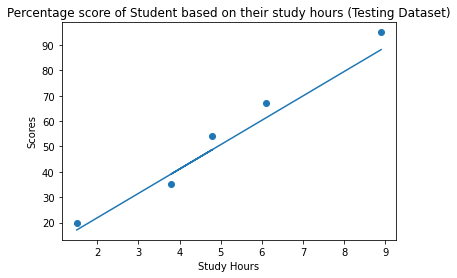

In [10]:
#Plotting The regression line for Test data
line2= line= lin.intercept_+lin.coef_*test_x

plt.scatter(test_x,test_y)
plt.plot(test_x,line)
plt.title('Percentage score of Student based on their study hours (Testing Dataset)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

---

### Projection of Percentage Score of Students

In [11]:
print(test_x) #Testing data in hours
pred_y=lin.predict(test_x) #Projection of scores

    Hours
5     1.5
21    4.8
22    3.8
18    6.1
15    8.9


In [12]:
# Comparing Actual and Predicted 

df_compare= pd.DataFrame({'Actual':test_y,'Predicted':pred_y})
df_compare

,Actual,Predicted
5,20,17.097967
21,54,48.783639
22,35,39.181920
18,67,61.265873
15,95,88.150686


In [13]:
# using the particular value of Hours Studied
hours= [9.25]
value=lin.predict([hours])
print('For number of hours {}, predicted score is {}'.format(hours,value))

For number of hours [9.25], predicted score is [91.51128762]


### Accuracy of the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [14]:
print('Mean_squared_error= {}, r2 Score={}'.format(mean_squared_error(test_y,pred_y),r2_score(test_y,pred_y)))

Mean_squared_error= 26.582796488881087, r2 Score=0.9605221627526419


### R<sup>2</sup> = 0.9605
**This indicates 96% proportion of the variance for percentage scores is explained by study hours.**